# Sri Lanka Rainfall and IPO
* Wenchang Yang (wenchang@prnceton.edu)
* Department of Geosciences, Princeton University

In [17]:
import sys, os, os.path, datetime, glob
import numpy as np, matplotlib.pyplot as plt, pandas as pd, xarray as xr
import xlearn
from geoplots import xticks2lon, yticks2lat

%matplotlib notebook

In [6]:
# params

## CHIRPS rainfall

In [2]:
# data
ncfile = 'data/SriLanka/chirps.p05.SriLanka.nc'
ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:    (latitude: 120, longitude: 60, time: 13757)
Coordinates:
  * latitude   (latitude) float32 5.0249977 5.074997 5.125 5.174999 ...
  * longitude  (longitude) float32 79.024994 79.07501 79.125 79.17499 ...
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 1981-01-03 ...
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.6
    title:                     CHIRPS Version 2.0
    history:                   Fri Sep 28 16:44:29 2018: ncrcat -v precip -d ...
    version:                   Version 2.0
    date_created:              2015-11-20
    creator_name:              Pete Peterson
    creator_email:             pete@geog.ucsb.edu
    institution:               Climate Hazards Group.  University of Californ...
    documentation:             http://pubs.usgs.gov/ds/832/
    reference:                 Funk, C.C., Peterson, P.J., Landsfeld, M.F., P...
    comments:                   time 

In [5]:
if 'das' not in globals():
    das = dict()
da = ds.precip.sel(time=slice(None, '2017')).resample(time='AS').mean('time')
das['pr'] = da
da

<xarray.DataArray 'precip' (time: 37, latitude: 120, longitude: 60)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [2.861165, 2.827705, ...,      nan,      nan],
        [2.84466 , 2.913774, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [2.141572, 2.154321, ...,      nan,      nan],
        [2.06243 , 2.161297, ...,      nan,      nan]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [2.287491, 2.297277, ...,      nan,      nan],
        [2.304937, 2.335584, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [3.370369, 3.386214, ...,      nan,      nan],
        [3.307124, 3.270365, ...,  

<IPython.core.display.Javascript object>


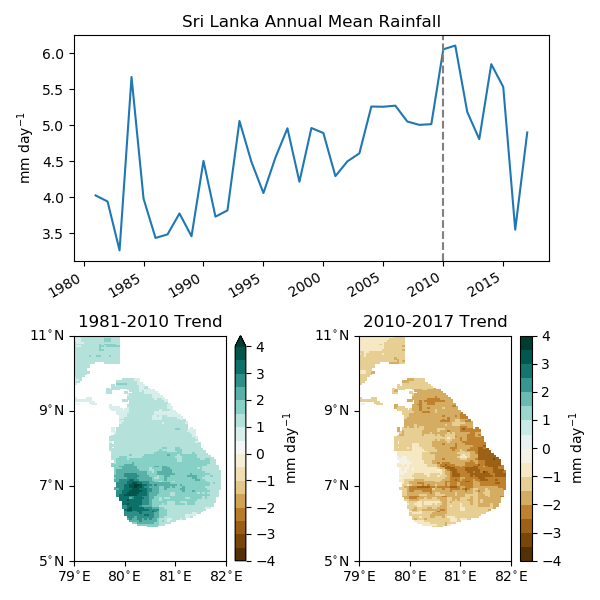

In [51]:
plt.style.use('default')

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(211)
das['pr'].mean(['longitude', 'latitude']).rename('mm day$^{-1}$').plot(ax=ax)
ax.set_title('Sri Lanka Annual Mean Rainfall')
ax.set_xticks([f'{year}' for year in np.arange(1980,2020, 5)])
ax.axvline('2010', ls='--', color='gray')
ax.set_xlabel('')

ax=plt.subplot(223)
year0, year1 = 1981, 2010
da = das['pr'].sel(time=slice(f'{year0}', f'{year1}'))
m = da.learn.regress(da['time.year'])
da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=np.arange(-4,4.1,.5), center=0, ax=ax, rasterized=True)
ax.set_title(f'{year0}-{year1} Trend')
plt.sca(ax)
xticks2lon(np.arange(79,83))
yticks2lat(np.arange(5,12,2))
ax.set_xlabel('')
ax.set_ylabel('')


ax=plt.subplot(224)
year0, year1 = 2010, 2017
da = das['pr'].sel(time=slice(f'{year0}', f'{year1}'))
m = da.learn.regress(da['time.year'])
da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=np.arange(-4,4.1,.5), center=0, ax=ax, rasterized=True)
ax.set_title(f'{year0}-{year1} Trend')
plt.sca(ax)
xticks2lon(np.arange(79,83))
yticks2lat(np.arange(5,12,2))
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()

plt.savefig('figs/fig_rainfall_SriLanka.pdf')
plt.savefig('figs/fig_rainfall_SriLanka.png', transparent=True)

<IPython.core.display.Javascript object>


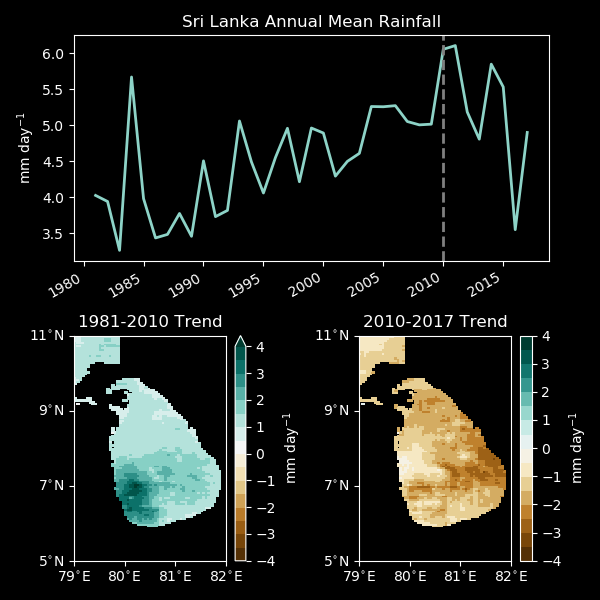

In [48]:
plt.style.use('dark_background')

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(211)
das['pr'].mean(['longitude', 'latitude']).rename('mm day$^{-1}$').plot(ax=ax)
ax.set_title('Sri Lanka Annual Mean Rainfall')
ax.set_xticks([f'{year}' for year in np.arange(1980,2020, 5)])
ax.axvline('2010', ls='--', color='gray')
ax.set_xlabel('')

ax=plt.subplot(223)
year0, year1 = 1981, 2010
da = das['pr'].sel(time=slice(f'{year0}', f'{year1}'))
m = da.learn.regress(da['time.year'])
da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=np.arange(-4,4.1,.5), center=0, ax=ax, rasterized=True)
ax.set_title(f'{year0}-{year1} Trend')
plt.sca(ax)
xticks2lon(np.arange(79,83))
yticks2lat(np.arange(5,12,2))
ax.set_xlabel('')
ax.set_ylabel('')


ax=plt.subplot(224)
year0, year1 = 2010, 2017
da = das['pr'].sel(time=slice(f'{year0}', f'{year1}'))
m = da.learn.regress(da['time.year'])
da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=np.arange(-4,4.1,.5), center=0, ax=ax, rasterized=True)
ax.set_title(f'{year0}-{year1} Trend')
plt.sca(ax)
xticks2lon(np.arange(79,83))
yticks2lat(np.arange(5,12,2))
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()

plt.savefig('figs/fig_rainfall_SriLanka_dark.pdf')
plt.savefig('figs/fig_rainfall_SriLanka_dark.png', transparent=True)

## OISST

In [52]:
# data
ncfile = 'data/oisst/sst/sst.mon.avhrr-only-v2.1981-09.2018-09.nc'
ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 720, lon: 1440, time: 445)
Coordinates:
  * time       (time) datetime64[ns] 1981-09-15T12:00:00 1981-10-16 ...
  * lon        (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
  * lat        (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.4 (http://m...
    Conventions:               CF-1.6
    history:                   Thu Oct 18 14:05:47 2018: ncrcat tmp_sst.avhrr...
    frequency:                 mon
    CDO:                       Climate Data Operators version 1.9.4 (http://m...
    NCO:                       "4.5.5"
    nco_openmp_thread_number:  1

In [53]:
da = ds.sst.sel(time=slice('1982', '2017')).resample(time='AS').mean('time')
das['sst'] = da
da

<xarray.DataArray 'sst' (time: 36, lat: 720, lon: 1440)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.538487, -1.538461, ..., -1.538515, -1.538487],
        [-1.539116, -1.539116, ..., -1.539143, -1.539116]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.518035, -1.518035, ..., -1.518147, -1.518119],
        [-1.51862 , -1.51862 , ..., -1.51862 , -1.51862 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.480052, -1.480052, ..., -1.480164, -1.480108],
        [-1.480359, -1.480359, ..., -1.480386, -1.480386]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.547305, -1.547305, ..., -1.547385,

In [90]:
m = das['sst'].learn.regress(das['pr'].sel(time=slice('1982','2017')).mean(['longitude', 'latitude']),
                            normalize_x=False)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=False, normalize_y=False.

<IPython.core.display.Javascript object>


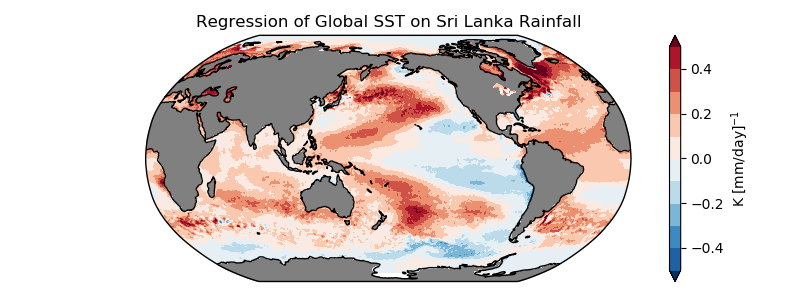

In [94]:
fig = plt.figure(figsize=(8,3))
m.coef_da.rename('K [mm/day]$^{-1}$').geo.cartoplot(proj='robin', 
                        proj_kws={'central_longitude': 180}, 
                        robust=True, 
                        levels=10, 
                        land_on=True, 
                        land_kws={'color':'0.5'}, rasterized=True)

plt.title('Regression of Global SST on Sri Lanka Rainfall')
plt.tight_layout()

plt.savefig('figs/fig_regression_sst.pdf', bbox_inches='tight')
plt.savefig('figs/fig_regression_sst.png', dpi=150, bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


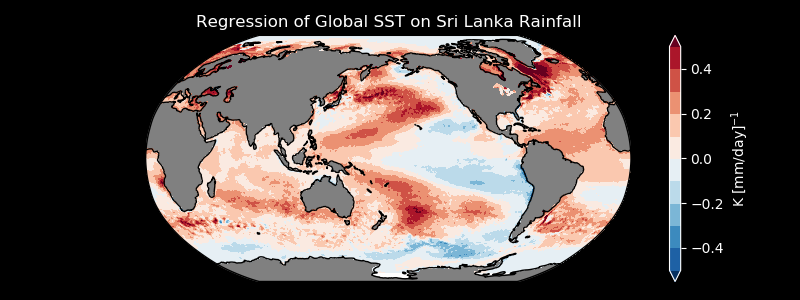

In [93]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(8,3))
m.coef_da.rename('K [mm/day]$^{-1}$').geo.cartoplot(proj='robin', 
                        proj_kws={'central_longitude': 180}, 
                        robust=True, 
                        levels=10, 
                        land_on=True, 
                        land_kws={'color':'0.5'}, rasterized=True)

plt.title('Regression of Global SST on Sri Lanka Rainfall')
plt.tight_layout()

plt.savefig('figs/fig_regression_sst_dark,.pdf', bbox_inches='tight')
plt.savefig('figs/fig_regression_sst_dark.png', dpi=150, bbox_inches='tight', transparent=True)

plt.style.use('default')

## GPCP

In [95]:
# data
ncfile = 'data/gpcp/v2p3/precip.mon.mean.nc'
ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 476)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 ...
  * lon        (lon) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         h

In [97]:
da = ds.precip.sel(time=slice('1981', '2017')).resample(time='AS').mean('time')
das['gpcp'] = da
da

<xarray.DataArray 'precip' (time: 37, lat: 72, lon: 144)>
array([[[0.353244, 0.350071, ..., 0.385211, 0.390811],
        [0.230117, 0.244145, ..., 0.253383, 0.24009 ],
        ...,
        [0.482416, 0.494497, ..., 0.484732, 0.484328],
        [0.486126, 0.491094, ..., 0.483026, 0.479545]],

       [[0.333573, 0.32751 , ..., 0.358635, 0.366479],
        [0.237324, 0.250988, ..., 0.257327, 0.246337],
        ...,
        [0.481995, 0.490625, ..., 0.488927, 0.4867  ],
        [0.527899, 0.535097, ..., 0.518334, 0.518106]],

       ...,

       [[0.268069, 0.264377, ..., 0.272586, 0.2709  ],
        [0.102123, 0.099925, ..., 0.107643, 0.103486],
        ...,
        [0.526441, 0.536032, ..., 0.5149  , 0.520943],
        [0.568183, 0.569424, ..., 0.565608, 0.56705 ]],

       [[0.376802, 0.371999, ..., 0.384147, 0.380762],
        [0.195324, 0.190039, ..., 0.214194, 0.20366 ],
        ...,
        [0.615743, 0.620024, ..., 0.610144, 0.612372],
        [0.647462, 0.64754 , ..., 0.645268, 0.

In [98]:
m = das['gpcp'].learn.regress(das['pr'].mean(['longitude', 'latitude']),
                            normalize_x=False)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=False, normalize_y=False.

<IPython.core.display.Javascript object>


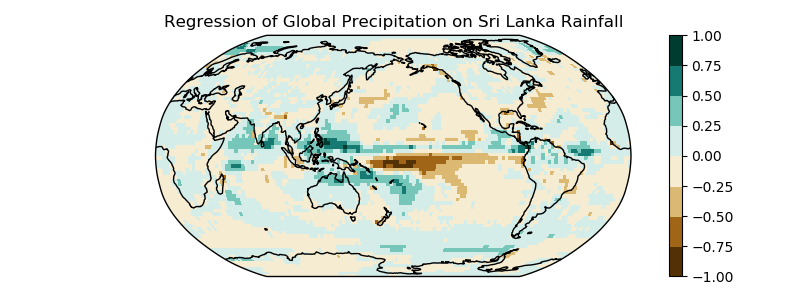

In [103]:
fig = plt.figure(figsize=(8,3))
m.coef_da.geo.cartoplot(proj='robin', 
                        proj_kws={'central_longitude': 180}, 
#                         robust=True, 
                        levels=10, 
                        cmap='BrBG',
                        rasterized=True)

plt.title('Regression of Global Precipitation on Sri Lanka Rainfall')
plt.tight_layout()

plt.savefig('figs/fig_regression_gpcp.pdf', bbox_inches='tight')
plt.savefig('figs/fig_regression_gpcp.png', dpi=150, bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


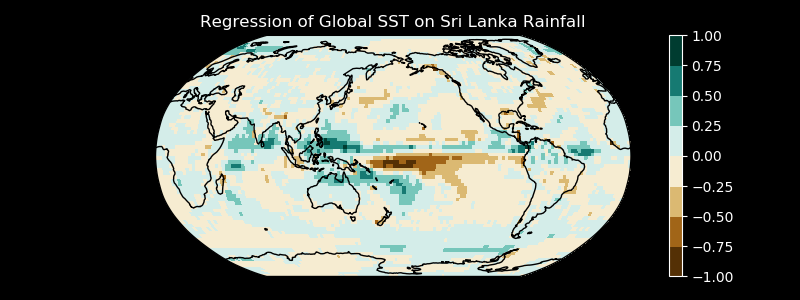

In [104]:
plt.style.use('dark_background')

fig = plt.figure(figsize=(8,3))
m.coef_da.geo.cartoplot(proj='robin', 
                        proj_kws={'central_longitude': 180}, 
#                         robust=True, 
                        levels=10, 
                        cmap='BrBG',
                        rasterized=True)

plt.title('Regression of Global SST on Sri Lanka Rainfall')
plt.tight_layout()

plt.savefig('figs/fig_regression_gpcp_dark,.pdf', bbox_inches='tight')
plt.savefig('figs/fig_regression_gpcp_dark.png', dpi=150, bbox_inches='tight', transparent=True)

plt.style.use('default')

In [8]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>